In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

Content(https://www.kaggle.com/shivam2503/diamonds)

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)


In [24]:
df = pd.read_csv('diamonds.csv')

In [25]:
df.head()

,carat,cut,color,clarity,depth,tbl,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
df.describe()

,carat,depth,tbl,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [27]:
df.cut.unique()


array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [28]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [29]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

In [30]:
#check for Null Values
df.isnull().values.any()
#no need to impute, but impute by group
#df.fillna(df.mean()) #imputes ALL columns with mean for each respectivlely
#df["ColumnX"].fillna(df["ColumnX"].mean(), inplace=True) #mean for specific column
#df["ColumnX"].fillna(df.groupby("ColumnZ")["ColumnX"].transform("mean"), inplace=True) #imputes by group

False

## placeholder for graphs

In [31]:
#get dummy variables for categorical
cat_col=[u'cut', u'color', u'clarity']
df_dummies = pd.get_dummies( df, columns = cat_col,drop_first=True )

In [32]:
df_dummies.head()

,carat,depth,tbl,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
df_dummies.columns

Index([        u'carat',         u'depth',           u'tbl',         u'price',
                   u'x',             u'y',             u'z',      u'cut_Good',
           u'cut_Ideal',   u'cut_Premium', u'cut_Very Good',       u'color_E',
             u'color_F',       u'color_G',       u'color_H',       u'color_I',
             u'color_J',    u'clarity_IF',   u'clarity_SI1',   u'clarity_SI2',
         u'clarity_VS1',   u'clarity_VS2',  u'clarity_VVS1',  u'clarity_VVS2'],
      dtype='object')

In [34]:
col=df_dummies.columns
col=col.drop('price')

In [35]:
#split into matricies for sklearn
X = df_dummies.loc[:, col].values
y = df_dummies.loc[:, 'price'].values

In [36]:
X

array([[  0.23,  61.5 ,  55.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.21,  59.8 ,  61.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.23,  56.9 ,  65.  , ...,   0.  ,   0.  ,   0.  ],
       ..., 
       [  0.7 ,  62.8 ,  60.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.86,  61.  ,  58.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.75,  62.2 ,  55.  , ...,   0.  ,   0.  ,   0.  ]])

In [37]:
#split into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333, random_state = 0)


In [38]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y_pred = lm.predict(X_test)
print(y_pred)[0:5]

[  4902.52809848   7579.51270371   6152.49008501  10291.57953339
   5255.02158361]


In [19]:
#Equation coefficient and Intercept
print('Coefficient: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)

('Coefficient: \n', array([  1.11790506e+04,  -6.80097274e+01,  -2.86830028e+01,
        -9.64219492e+02,  -4.77041772e+00,  -4.66084924e+01,
         5.38492300e+02,   7.89529603e+02,   7.16215653e+02,
         6.90117831e+02,  -1.81040218e+02,  -2.36735795e+02,
        -4.53090959e+02,  -9.47811179e+02,  -1.42573504e+03,
        -2.33828702e+03,   5.30377337e+03,   3.64579166e+03,
         2.67333925e+03,   4.56731033e+03,   4.24707031e+03,
         4.99648269e+03,   4.92676801e+03]))
('Intercept: \n', 2481.4580573955236)


In [39]:
lm.score(X_train, y_train)

0.91943450706612107

In [20]:
r2_score(y_test, y_pred)

0.92044173901947801

In [41]:
r2_score(y_test, y_pred, multioutput='variance_weighted') 

0.92044173901947801

In [48]:
error_results=cross_val_score(lm, X_train, y_train,scoring='neg_mean_squared_error') #'neg_mean_absolute_error'
print("MAE: %.3f (%.3f)") % (error_results.mean(), error_results.std())

MAE: -1286917.891 (24848.223)


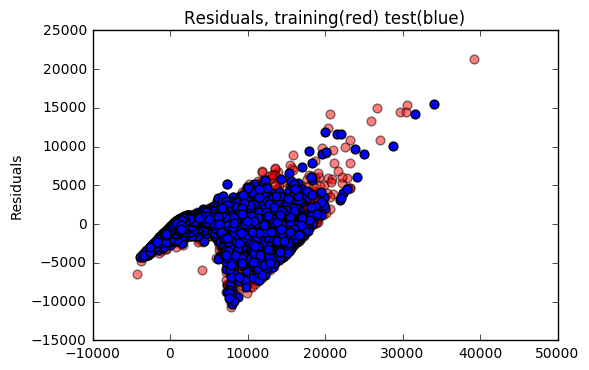

In [24]:
#working in python, but not jupyter at the moment
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='r', s=40,alpha=0.5)
plt.scatter(lm.predict(X_test),  lm.predict(X_test)  - y_test,  c='b', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residuals, training(red) test(blue)')
plt.ylabel('Residuals')
plt.show()

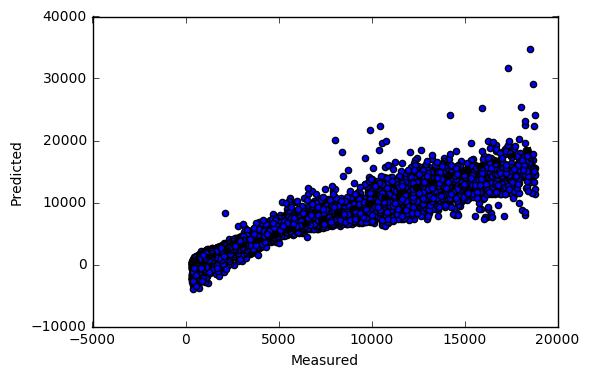

In [25]:
from sklearn.model_selection import cross_val_predict
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lm, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [26]:
#placeholder for doing forward, backward elmination

In [27]:
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
egressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
X_opt = X[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

# Polynomial Regression

In [50]:
from sklearn.preprocessing import PolynomialFeatures
plyreg = PolynomialFeatures(degree = 4)

In [ ]:
X_plyreg = plyreg.fit_transform(X_train)
plyreg.fit(X_plyreg, y_train)

KeyboardInterrupt: 

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_plyreg, y_train)

In [ ]:
y_pred_ply=lin_reg.predict(plyreg.fit_transform(X_test))

In [ ]:
#evaluate the model

In [49]:
#lin_reg.score(X_plyreg, y_train)

NameError: name 'plyreg' is not defined

In [ ]:
#r2_score(y_test, y_pred_ply)

In [ ]:
#r2_score(y_test, y_pred_ply, multioutput='variance_weighted')

In [ ]:
#error_results=cross_val_score(lin_reg, X_train, y_train,scoring='neg_mean_squared_error') #'neg_mean_absolute_error'
#print("MAE: %.3f (%.3f)") % (error_results.mean(), error_results.std())

# SVR

In [ ]:
# Feature Scaling
#SVR doesn't feature scale
from sklearn.preprocessing import StandardScaler
stdsclr_X = StandardScaler()
stdsclr_y = StandardScaler()
sclr_X_train = stdsclr_X.fit_transform(X_train)
sclr_y_train = stdsclr_y.fit_transform(y_train)
sclr_X_test = stdsclr_X.fit_transform(X_test)
sclr_y_test = stdsclr_y.fit_transform(y_test)

In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
#different kernals(this is guassian, as well as penalties)
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(sclr_X_train, sclr_y_train)

In [ ]:
#need to inverse transform to get the actual value of salary
y_pred_svr = sclr_y_test.inverse_transform(svr_regressor.predict(X_test))

In [ ]:
#plots and evaluation of the model

In [ ]:
svr_regressor.score(sclr_X_train, sclr_y_train)

In [ ]:
r2_score(y_test, y_pred_svr)

In [ ]:
r2_score(y_test, y_pred_svr, multioutput='variance_weighted') 

In [ ]:
error_results=cross_val_score(svr_regressor, sclr_X_train, sclr_y_train,scoring='neg_mean_squared_error') #'neg_mean_absolute_error'
print("MAE: %.3f (%.3f)") % (error_results.mean(), error_results.std())

In [ ]:
#Decision Tree

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

In [ ]:
dt_regressor.score(X_train, y_train)

In [ ]:
# Predicting a new result
y_pred_dt = dt_regressor.predict(X_test)

In [ ]:
dt_regressor.score(X_train, y_train)

In [ ]:
r2_score(y_test, y_pred_dt)

In [ ]:
r2_score(y_test, y_pred_dt, multioutput='variance_weighted') 

In [ ]:
error_results=cross_val_score(dt_regressor, X_train, y_train,scoring='neg_mean_squared_error') #'neg_mean_absolute_error'
print("MAE: %.3f (%.3f)") % (error_results.mean(), error_results.std())

In [ ]:
#Random Forrest

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
rf_regressor.fit(X_train, y_train)

In [ ]:
rf_regressor.score(X_train, y_train)

In [ ]:
# Predicting a new result
y_pred_rf = rf_regressor.predict(X_test)

In [ ]:
#evaluating all of the models

In [ ]:
rf_regressor.score(X_train, y_train)

In [ ]:
r2_score(y_test, y_pred_rf)

In [ ]:
r2_score(y_test, y_pred_rf, multioutput='variance_weighted') 

In [ ]:
error_results=cross_val_score(rf_regressor, X_train, y_train,scoring='neg_mean_squared_error') #'neg_mean_absolute_error'
print("MAE: %.3f (%.3f)") % (error_results.mean(), error_results.std())